### <b> Dominik Szot <br> Laboratorium 07 <br> Kwadratury adaptacyjne </b>

<b> Zadanie 1 </b>  Oblicz wartość całki z poprzedniego laboratorium
$$
    \int_0^{1} \frac {4} {1+x^2}dx
$$
korzystając z:

* kwadratur adaptacyjnych trapezów,

* kwadratur adaptacyjnych Gaussa-Kronroda.

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w
zależności od liczby ewaluacji funkcji podcałkowej. Wyniki dodaj do wykresu
uzyskanego w poprzednim laboratorium. Przydatna będzie funkcja
`scipy.integrate.quad_vec` . Na liczbę ewaluacji funkcji podcałkowej można
wpływać pośrednio, zmieniając wartość dopuszczalnego błędu (tolerancji). Przyjmij wartości tolerancji z zakresu od $ 100 $ do $ 10^{−14} $

<b> Zadanie 2</b> Powtórz obliczenia z poprzedniego oraz dzisiejszego laboratorium
dla całek

* (2) $$ \int_0^1 \sqrt {x} \log x dx = - \frac {4} {9} $$ 

* (3) $$ \int_0^1 (\frac {1} {(x-0.3)^2} + a + \frac {1} {(x-0.9)^2 + b} - 6)dx $$

We wzorze (3) przyjmij $ a = 0.001 $ oraz $ b = 0.004 $. Błąd kwadratury dla całki
oblicz, wykorzystując fakt, że

$$ 
    \int_0^1 \frac {1} {(x-x_0)^2 + a} dx = \frac {1} {\sqrt a}(\arctg(\frac {1-x_0} {\sqrt{a}} + \arctg{\frac{x_0} {\sqrt{a}}})) 
$$


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

Równania do numerycznego obliczenia oraz rozwiązania równań.

In [10]:
functions = [int for _ in range(3)]
functions[0] = lambda x: np.double(4./(x**2 + 1))
functions[1] = lambda x: 0 if x == 0 else np.double(x ** 0.5 * np.log(x))
f3_h  = lambda x,a,b : 1/((x-a)**2 + b)
functions[2] = lambda x: f3_h(x, 0.3, 0.001) + f3_h(x, 0.9, 0.004) - 6

In [11]:
solutions = [None for _ in range(3)]
f3_helper_ans = lambda x0, a : 1/np.power(a, 0.5) * (np.arctan((1-x0)
                /np.power(a, 0.5))+np.arctan((x0)/np.power(a, 0.5)) )

solutions[0] = np.pi
solutions[1] = -4/9
solutions[2] = f3_helper_ans(0.3, 0.001) + f3_helper_ans(0.9, 0.004) - 6 

error_trapz = []
error_gauss = []
error_trapz_adaptive = []
error_simps = []
error_rectangle = []


* W celu obliczenia wartości całki za pomocą kwadratur adaptacyjnych trapezów używam funkcji `scipy.integrate.quad_vec()` 
* Kwadratury adaptacyjne Gaussa-Kronroda nie działają

In [12]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}


Obliczanie kwadratur adaptacyjnych

In [13]:

max_no_evaluations = 14
def adaptive_quadratures(f_x, f_actual):
    a = 0
    b = 1
    last = len(error_trapz_adaptive)
    error_trapz_adaptive.append({})
    error_gauss.append({})
    
    for i in range(max_no_evaluations):
        error = 10**(-i)
        y1, err_y1, info_y1 = integrate.quad_vec(f_x, a, b, limit=10**6, epsrel=error, quadrature='trapezoid', full_output=True)
        
        y2, err_y1, info_y2 = integrate.quad_vec(f_x, a, b, limit=10**6, epsrel=error, quadrature='gk21', full_output=True)
        
        error_trapz_adaptive[last][info_y1.neval] = np.abs((f_actual - y1)/f_actual)
        error_gauss[last][info_y2.neval] = np.abs((f_actual - y2)/f_actual)

Następnie definiuję funkcję potrzebną do obliczenia całki metodą kwadratur prostokątów oraz definiuję funkcję obliczającą wartość całki dla kwadratur nieadaptacyjnych.

In [14]:
def rectangular_method(nodes, f_x) -> None:
    accumulated = 0.
    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*f_x(nodes[i-1] + (nodes[i] - nodes[i-1])/2)
    
    return accumulated

In [15]:
def quadrature_methods(f_x, f_actual):
    max_no_evaluations = 22
    a = 0
    b = 1
    last = len(error_trapz)
    error_trapz.append({})
    error_simps.append({})
    error_rectangle.append({})
    
    for i in range(1, max_no_evaluations):
        no_nodes = 2**i + 1
        quadrature_nodes = np.array([np.double(a) + np.double(i) * np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
        
        quadrature_points = [f_x(i) for i in quadrature_nodes]
        result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
        result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
        result_rectangle = rectangular_method(quadrature_nodes, f_x)
        
        error_trapz[last][no_nodes]=np.abs(((f_actual - result_trapz)/f_actual))
        error_simps[last][no_nodes]=np.abs(((f_actual - result_simps)/f_actual))
        error_rectangle[last][no_nodes]=np.abs((( f_actual - result_rectangle)/f_actual))

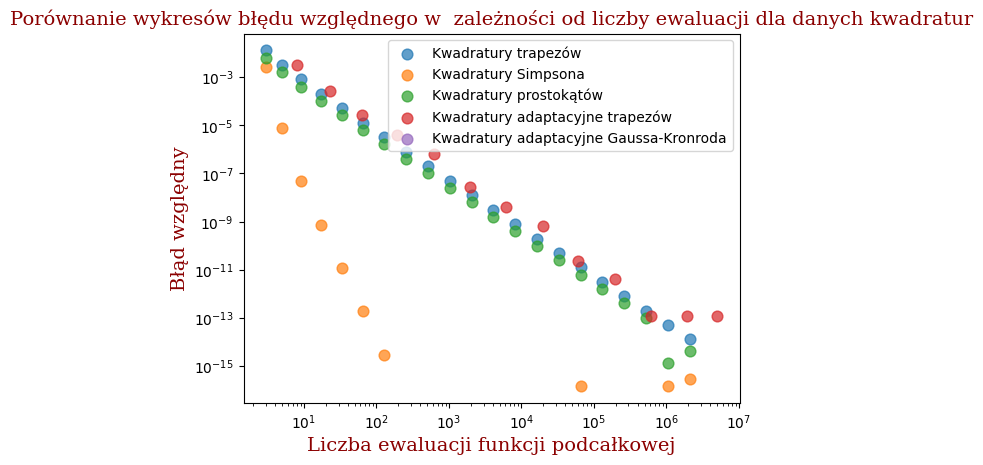

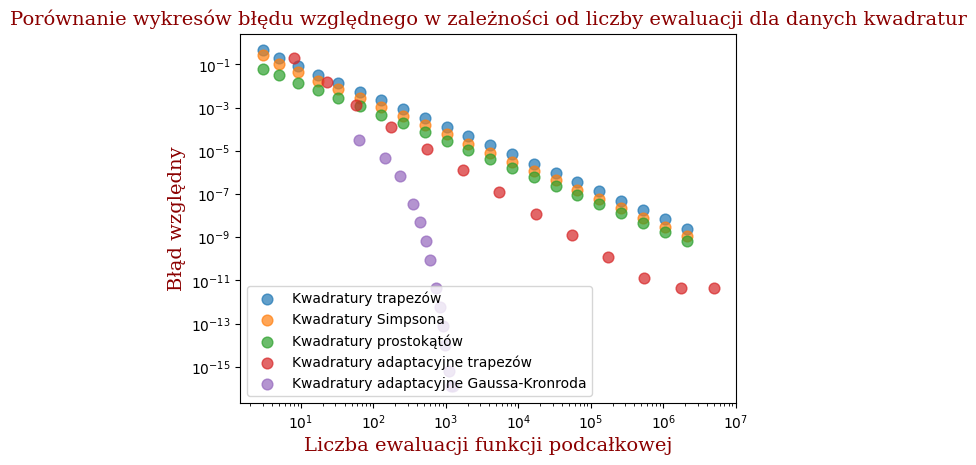

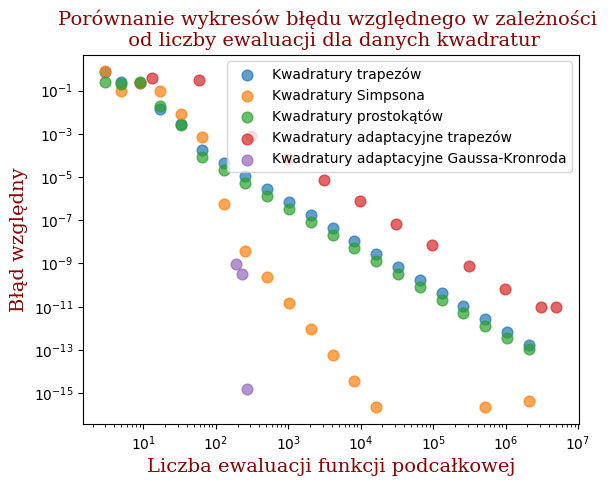

In [16]:
error_trapz = []
error_gauss = []
error_trapz_adaptive = []
error_simps = []
error_rectangle = []
quadrature_methods(functions[0], solutions[0])
adaptive_quadratures(functions[0], solutions[0])

fig, ax = plt.subplots()
labels = [
    'Kwadratury trapezów',
    'Kwadratury Simpsona',
    'Kwadratury prostokątów',
    'Kwadratury adaptacyjne trapezów',
    'Kwadratury adaptacyjne Gaussa-Kronroda',
]

j = 0

for i in (error_trapz, error_simps, error_rectangle, error_trapz_adaptive, error_gauss):
    ax.scatter(i[len(i) -1].keys(),i[len(i) -1].values(), s=60, alpha=0.7, label = labels[j])
    ax.set_xscale("log")
    ax.set_yscale("log")
    j+= 1
    
plt.legend()
plt.xlabel("Liczba ewaluacji funkcji podcałkowej", fontdict=font)
plt.ylabel("Błąd względny", fontdict=font)
plt.title('''Porównanie wykresów błędu względnego w  zależności od liczby ewaluacji dla danych kwadratur''', fontdict=font)
plt.show()

fig, ax = plt.subplots()
quadrature_methods(functions[1], solutions[1])
adaptive_quadratures(functions[1], solutions[1])
j = 0

for i in (error_trapz, error_simps, error_rectangle, error_trapz_adaptive, error_gauss):
    ax.scatter(i[len(i) -1].keys(),i[len(i) -1].values(), s=60, alpha=0.7, label = labels[j])
    ax.set_xscale("log")
    ax.set_yscale("log")
    j+= 1
    
plt.legend()
plt.xlabel("Liczba ewaluacji funkcji podcałkowej", fontdict=font)
plt.ylabel("Błąd względny", fontdict=font)
plt.title('''Porównanie wykresów błędu względnego w zależności od liczby ewaluacji dla danych kwadratur''', fontdict=font)
plt.show()

fig, ax = plt.subplots()
quadrature_methods(functions[2], solutions[2])
adaptive_quadratures(functions[2], solutions[2])
j = 0

for i in (error_trapz, error_simps, error_rectangle, error_trapz_adaptive, error_gauss):
    ax.scatter(i[len(i) -1].keys(),i[len(i) -1].values(), s=60, alpha=0.7, label = labels[j])
    ax.set_xscale("log")
    ax.set_yscale("log")
    j+= 1
    
plt.legend()
plt.xlabel("Liczba ewaluacji funkcji podcałkowej", fontdict=font)
plt.ylabel("Błąd względny", fontdict=font)
plt.title('''Porównanie wykresów błędu względnego w zależności 
 od liczby ewaluacji dla danych kwadratur''', fontdict=font)
plt.show()



Kwadratury adaptacyjne dają zdecydowanie dokładniejsze wyniki niż kwadratury zwyczajne. <br>
Jest to spowodowane automatycznym dobieraniem liczby węzłów do obliczania funkcji. <br>
W porównaniu kwadratur adaptacyjnych wartość błędu względnego <br>
prawie zawsze spadała szybciej na korzyść kwadratur `Gaussa-Kronroda`.

### Bibliografia

* Katarzyna Rycerz: Wykłady z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Marcin Kuta: Materiały z zajęć - Quadratures 